<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_100Hz_SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
data = pd.read_csv('/content/drive/MyDrive/CIOP/Particle clustering/210902_#4_100_30_1um_i002.csv',sep=';')
data.dropna(inplace=True)
pd.set_option('Max_Column', None)
data.head(2)

,,Label,Area,Mean,StdDev,Mode,Min,Max,X,Y,XM,YM,Perim.,BX,BY,Width,Height,Major,Minor,Angle,Circ.,Feret,IntDen,Median,Skew,Kurt,%Area,RawIntDen,Slice,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Group
0,1,210902_#4_100_30_1um_i002.tif:0402-0360,781.396260,144.858268,17.736486,130,101,184,893.857512,997.412210,893.630923,996.848204,103.350301,875.605557,982.265724,34.726566,29.765628,36.831308,27.012471,166.244422,0.919301,37.207035,113191.70870,143,0.058007,-0.841168,100,18397,1,354.0,397.5,143.130102,26.913915,1.363493,0.733411,0.969466,1
1,2,210902_#4_100_30_1um_i002.tif:0454-0174,633.730825,155.145631,18.371124,159,101,195,433.564307,1126.217214,433.981180,1126.085428,94.317242,416.718792,1113.730581,32.246097,27.285159,32.440485,24.872968,19.442913,0.895226,36.052232,98320.56883,159,-0.766990,0.290540,100,15980,1,168.0,457.0,26.565051,26.044925,1.304247,0.766726,0.940639,1


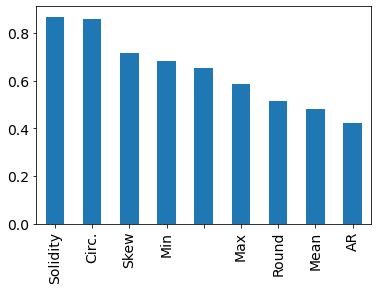

In [232]:
data.corr()['Group'].abs().sort_values(ascending=False)[1:10].plot(kind='bar')

In [227]:
top_10_corr= data.corr()['Group'].abs().sort_values(ascending=False)[1:10].index

In [233]:
def preprocessing(df):
    df = df.copy()
    X = df[['Circ.','Solidity','Skew','Min','Max','Round','Mean','AR']]
   # df = df.rename(columns={"Circ sqrt": "Circularity C",
   #                         'Equivalent Diameter':'Equivalent Diameter [nm]'})
   # df = df['AR','Mean','Round','Max','Min','Skew','Circ.','Solidity']
  #  df = df.drop(['Label',' '],axis=1)
   # df=df.drop(['BY','Y','YM','FeretAngle','%Area','Slice','XM','X','Angle'],axis=1)
    #df['equivalent diameter'] = 2*(df['Area']/np.pi)**0.5
    df.dropna(inplace=True)
    y = df['Group']
    #X = df.drop('Group',axis=1)
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    #X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
    return X,y
X,y = preprocessing(data)

In [234]:
X.head(3)

,Circ.,Solidity,Skew,Min,Max,Round,Mean,AR
0,1.341954,1.177259,-0.767247,-0.333232,-1.221576,0.816209,-0.448383,-0.780034
1,1.265581,1.031743,-2.253794,-0.333232,-0.849485,0.992970,0.064702,-0.858249
2,1.297882,1.240442,-1.057779,-0.142081,0.368268,0.994996,0.849493,-0.859106


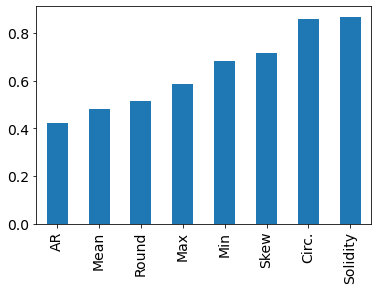

In [235]:
X.corrwith(y).abs().sort_values().plot(kind='bar')

In [236]:
y

0      1
1      1
2      1
3      1
4      1
      ..
517    0
518    1
519    1
520    0
521    0
Name: Group, Length: 522, dtype: int64

In [237]:
from sklearn.cluster import SpectralClustering, KMeans,AgglomerativeClustering,DBSCAN

cluster_models = {
    'Spectral Clustering':SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=464
                            ),
    'Spectral Biclustering': KMeans(n_clusters=2),
    'AgglomerativeClustering':AgglomerativeClustering(),
    "DBSCAN":DBSCAN(eps=9.7, min_samples=2, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2)
}

cluster_score = []
cluster_results = pd.DataFrame()
cluster_results['true'] = y
for name,cluster_model in cluster_models.items():
    cluster_model.fit(X)
    print(confusion_matrix(y,cluster_model.labels_))
    cluster_score.append([name,accuracy_score(y,cluster_model.labels_)])
    cluster_results[name] = cluster_model.labels_
cluster_score = pd.DataFrame(cluster_score, columns=['model name', 'Accuracy'])
cluster_score.sort_values('Accuracy',ascending=False)

[[328   0]
 [  3 191]]
[[ 11 317]
 [188   6]]
[[328   0]
 [  1 193]]
[[328   0]
 [194   0]]


,model name,Accuracy
2,AgglomerativeClustering,0.998084
0,Spectral Clustering,0.994253
3,DBSCAN,0.628352
1,Spectral Biclustering,0.032567


In [166]:
model = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=464)
model.fit(X)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=464)

In [167]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#model.labels_[model.labels_ == 2] = 1
print(confusion_matrix(y,model.labels_))
print(round(accuracy_score(y,model.labels_),2))

[[327   1]
 [ 14 180]]
0.97


In [157]:
legend_map = {0: 'Agglomerates',
              1: 'Spherical particles'
              }
labels = pd.DataFrame()
labels['y_true'] = y
#labels['y_true_label']=labels['y_true'].map(legend_map)

labels['Spectral Clustering'] = model.labels_
#labels['y_pred_label']= labels['y_pred'].map(legend_map)
labels


,y_true,Spectral Clustering
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
517,0,0
518,1,1
519,1,1
520,0,0


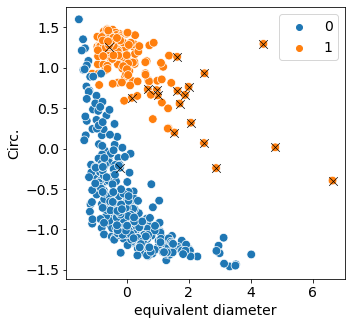

In [159]:
X['y_true'] = labels['y_true']
X['Spectral Clustering'] = labels['Spectral Clustering']
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=X,
                y='Circ.',
                x='equivalent diameter',
                hue=y,
                s=75,
             #   palette = "binary",
               # fc="none",
               # edgecolor="black",
                )
sns.scatterplot(data=X[X['y_true'] != X['Spectral Clustering']],
                y='Circ.',
                x='equivalent diameter',
                color='black',
                s=75,
                marker="x")
X = X.drop(['y_true','Spectral Clustering'],axis=1)

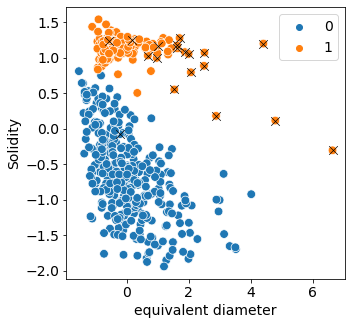

In [83]:
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 14})
sns.scatterplot(data=X,
                y='Solidity',
                x='equivalent diameter',
                hue=y,
                s=75,
             #   palette = "binary",
               # fc="none",
               # edgecolor="black",
                )
sns.scatterplot(data=X[X['y_true'] != X['y_pred']],
                y='Solidity',
                x='equivalent diameter',
                color='black',
                s=75,
                marker="x")

In [130]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

models = {'KNeighborsClassifier':KNeighborsClassifier(),
          'LogisticRegression':LogisticRegression(),
          'SVC': SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GaussianNB':GaussianNB(),
         }

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [132]:
score = []
results = pd.DataFrame()
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score.append([name,accuracy_score(y_test,y_pred)])
    results[name] = model.predict(X)
score = pd.DataFrame(score, columns=['model name', 'Accuracy'])
score.sort_values('Accuracy',ascending=False)

,model name,Accuracy
1,LogisticRegression,1.000000
2,SVC,1.000000
4,RandomForestClassifier,1.000000
5,AdaBoostClassifier,1.000000
0,KNeighborsClassifier,0.990476
3,DecisionTreeClassifier,0.990476
6,GaussianNB,0.980952


In [106]:
from sklearn.cluster import SpectralClustering


In [129]:
for name,model in cluster_models.items():
    model.fit(X,y)
    y_pred = model.labels_
    results[name] = y_pred
    score.append([name,accuracy_score(y,y_pred)])
score = pd.DataFrame(score, columns=['model name', 'Accuracy'])
score.sort_values('Accuracy',ascending=False)

,model name,Accuracy
1,Spectral Clustering,0.601533
0,Spectral Clustering,0.032567


In [101]:
results['SpectralClustering'] = labels['y_pred']

In [102]:
len(results.columns)

8

In [ ]:
X = pd.concat([X,labels],axis=1)

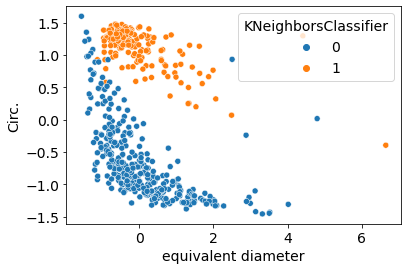

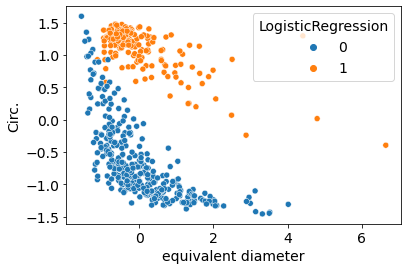

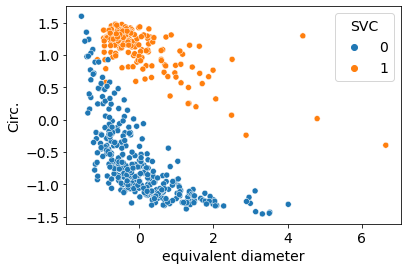

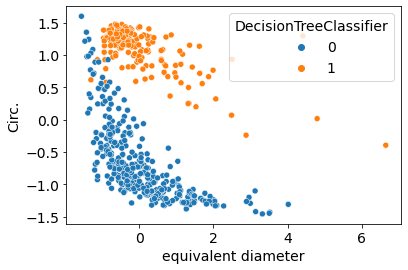

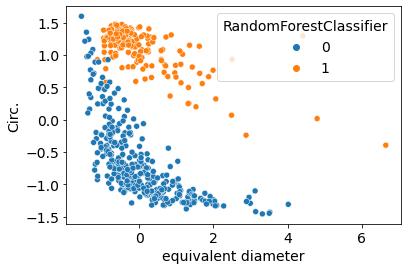

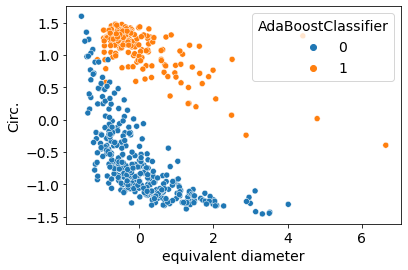

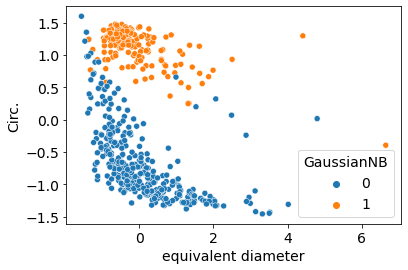

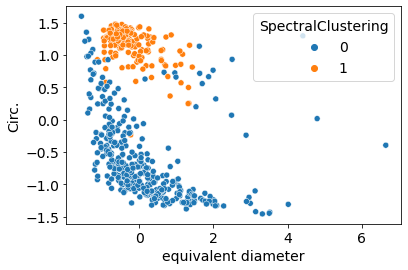

In [103]:
for columns in results.columns:
    sns.scatterplot(data=X, y='Circ.',x='equivalent diameter', hue=results[columns])
    plt.show()

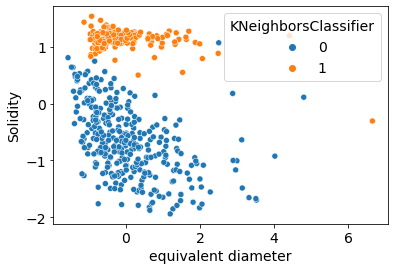

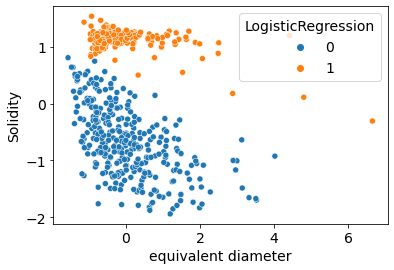

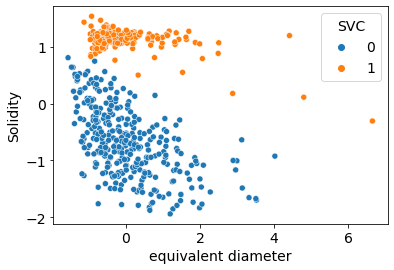

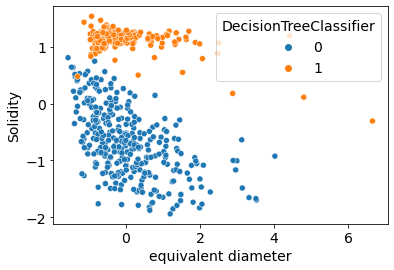

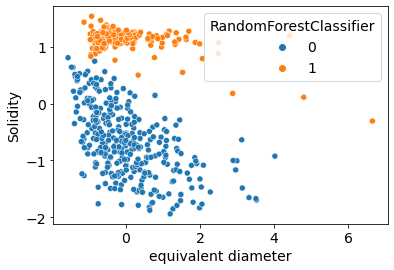

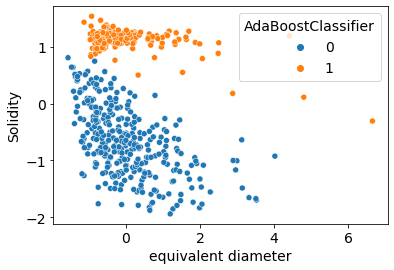

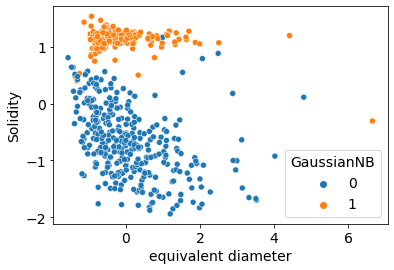

In [100]:
for columns in results.columns:
    sns.scatterplot(data=X, y='Solidity',x='equivalent diameter', hue=results[columns])
    plt.show()